# Irrigation circles near Biri-Manyame Dam, Zimbabwe, Summer 2023

Explore the transformation of irrigation circles near Biri-Manyame Dam, Zimbabwe, during the summer of 2023. 

This workflow guides you through the process of comparing satellite images before and after irrigation, creating maps, and visualizing the impact on crop greenness using the NDVI (Normalized Difference Vegetation Index) derived from the optical data of Sentinel 2. Compare the insights derived from different satellite images to gain a comprehensive understanding of the evolving agricultural landscape and usage.

- [Copernicus Sentinel-2 MSI  - Level-2A - RGB composite](https://dunia.esa.int/default-datasets/sentinel-2)

### The Biri-Manyame Dam and irrigation circles, visualized in images from August 2023 of irrigated conditions
![The Biri-Manyame Dam, visualized in images from August 2023 of irrigated conditions](img/zimbabwe_irrigation_wet_screenshot.PNG)
### The Biri-Manyame Dam and irrigation circles, visualized in images from September 2023 of dry conditions
![The Biri-Manyame Dam, visualized in images from September 2023 of dry conditions](img/zimbabwe_irrigation_dry_screenshot.PNG)

#### Import required libraries

In [1]:

import numpy as np
import os
from glob import glob

import rasterio as rio
from datetime import datetime

from eodag import EODataAccessGateway, setup_logging

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

Choosing start and end timephase for the analysis

In [2]:
start_dt="2023-08-01"
end_dt ="2023-09-30"

We use the EODAG to search for `S2_MSI_L2A`.   This product type stands for Sentinel-2 data of Level 2A, which are already atmospherically corrected optical images.  
  
We use the date range which has been defined above with the dates to see the scenery of differences in irrigation.

In [3]:
setup_logging(2)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((30.154724 -17.548488, 30.154724 -17.457791, 30.273514 -17.457791, 30.273514 -17.548488, 30.154724 -17.548488))"
search_results, total_count = dag.search(
    productType="S2_MSI_L2A",
    geom=geometry,
    start=start_dt,
    end=end_dt,
    cloudCover=10,
)

2024-02-06 16:53:35,029 eodag.config                     [INFO    ] Loading user configuration from: /home/eoafrica/.config/eodag/eodag.yml
2024-02-06 16:53:35,046 eodag.config                     [INFO    ] mundi: unknown provider found in user conf, trying to use provided configuration
2024-02-06 16:53:35,046 eodag.config                     [WARNING ] mundi skipped: could not be loaded from user configuration
2024-02-06 16:53:35,049 eodag.core                       [INFO    ] usgs: provider needing auth for search has been pruned because no crendentials could be found
2024-02-06 16:53:35,049 eodag.core                       [INFO    ] aws_eos: provider needing auth for search has been pruned because no crendentials could be found
2024-02-06 16:53:35,050 eodag.core                       [INFO    ] meteoblue: provider needing auth for search has been pruned because no crendentials could be found
2024-02-06 16:53:35,050 eodag.core                       [INFO    ] hydroweb_next: provide

Downloading only an early date and a late date of all products

In [4]:
search_results

SearchResult([EOProduct(id=S2B_MSIL2A_20230814T074619_N0509_R135_T36KTF_20230814T121147, provider=creodias_s3),
              EOProduct(id=S2A_MSIL2A_20230819T074621_N0509_R135_T35KRA_20230819T121858, provider=creodias_s3),
              EOProduct(id=S2B_MSIL2A_20230903T074619_N0509_R135_T36KTF_20230903T110250, provider=creodias_s3),
              EOProduct(id=S2A_MSIL2A_20230908T074621_N0509_R135_T36KTF_20230908T134558, provider=creodias_s3),
              EOProduct(id=S2A_MSIL2A_20230918T074611_N0509_R135_T36KTF_20230918T123401, provider=creodias_s3),
              EOProduct(id=S2B_MSIL2A_20230923T074629_N0509_R135_T35KRA_20230923T104033, provider=creodias_s3),
              EOProduct(id=S2B_MSIL2A_20230814T074619_N0509_R135_T35KRA_20230814T121147, provider=creodias_s3),
              EOProduct(id=S2B_MSIL2A_20230824T074619_N0509_R135_T36KTF_20230824T121240, provider=creodias_s3),
              EOProduct(id=S2B_MSIL2A_20230903T074619_N0509_R135_T35KRA_20230903T110250, provider=creodi

Sort results by date

In [5]:
# Sort the search_results list by the "publicationDate" property
sorted_search_results = sorted(search_results, key=lambda x: x.properties.get("publicationDate", ""))
sorted_search_results


[EOProduct(id=S2B_MSIL2A_20230804T074619_N0509_R135_T35KRA_20230804T103843, provider=creodias_s3),
 EOProduct(id=S2B_MSIL2A_20230804T074619_N0509_R135_T36KTF_20230804T103843, provider=creodias_s3),
 EOProduct(id=S2B_MSIL2A_20230814T074619_N0509_R135_T35KRA_20230814T121147, provider=creodias_s3),
 EOProduct(id=S2B_MSIL2A_20230814T074619_N0509_R135_T36KTF_20230814T121147, provider=creodias_s3),
 EOProduct(id=S2A_MSIL2A_20230819T074621_N0509_R135_T36KTF_20230819T121858, provider=creodias_s3),
 EOProduct(id=S2A_MSIL2A_20230819T074621_N0509_R135_T35KRA_20230819T121858, provider=creodias_s3),
 EOProduct(id=S2B_MSIL2A_20230824T074619_N0509_R135_T35KRA_20230824T121240, provider=creodias_s3),
 EOProduct(id=S2B_MSIL2A_20230824T074619_N0509_R135_T36KTF_20230824T121240, provider=creodias_s3),
 EOProduct(id=S2A_MSIL2A_20230829T074621_N0509_R135_T35KRA_20230829T123128, provider=creodias_s3),
 EOProduct(id=S2A_MSIL2A_20230829T074621_N0509_R135_T36KTF_20230829T123128, provider=creodias_s3),
 EOProduct

Set the DUNIA Sandbox project root

In [6]:
sandbox_project_root = '/home/eoafrica'

Choosing the dates for analysis. In this case, the dry and wet conditions are the earlierst and latest results.

In [7]:
earliest_result = sorted_search_results[0]
latest_results = sorted_search_results[-1]
selected_results = [earliest_result, latest_results]
selected_results

[EOProduct(id=S2B_MSIL2A_20230804T074619_N0509_R135_T35KRA_20230804T103843, provider=creodias_s3),
 EOProduct(id=S2A_MSIL2A_20230928T074711_N0509_R135_T36KTF_20230928T112354, provider=creodias_s3)]

Plotting the images.
While doing so, we already use the library rasterio to read the image into a numpy array.

Since matplotlib expects the z-axis that represents the image bands (red, green and blue) to be the first dimension, we need to re-arrange/tanspose the dimensions before plotting the images by using numpy.transpose.

In [8]:
os.listdir(sandbox_project_root + search_results[0].properties['productIdentifier'])

['DATASTRIP',
 'GRANULE',
 'HTML',
 'INSPIRE.xml',
 'MTD_MSIL2A.xml',
 'S2B_MSIL2A_20230814T074619_N0509_R135_T36KTF_20230814T121147-ql.jpg',
 'manifest.safe',
 'rep_info']

Getting the TCI and calculating the NDVI


NDVI (Normalized Difference Vegetation Index) is a vegetation index widely used in remote sensing to assess the health and density of vegetation. It quantifies the difference between the reflectance of near-infrared (NIR) and red wavelengths, providing a measure of plant vigor and photosynthetic activity.

In [9]:
# Create a dictionary to map publication dates to regions of interest (ROIs)
publication_date_to_roi_map = {}

# Iterate through selected search results
for result in selected_results:
    # Get the publication date of the result
    publication_date_str = result.properties.get("publicationDate", "")
    print(publication_date_str)
    # Convert the publication date string to a datetime object
    publication_date = datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    # Construct the path to the Sentinel-2 data directory
    s2_dir = sandbox_project_root + result.properties['productIdentifier']
    # Search for the R10m data directory within the Sentinel-2 data
    r10m_path = glob(s2_dir + "/GRANULE/*/IMG_DATA/R10m")
    # Check if the R10m data directory was found
    if r10m_path:
        # Search for the TCI (True Color Image) file within the R10m directory
        tci_path = glob(r10m_path[0] + "/*_TCI_10m.jp2")
        # Check if the TCI file exists
        if os.path.exists(tci_path[0]):
            print(tci_path[0])
            # Open the TCI file using rasterio
            with rio.open(tci_path[0]) as src:
                tci_array = src.read()
            # Transpose the TCI array to change the axis order
            transposed_tci = np.transpose(tci_array, (1, 2, 0))
            # Extract a region of interest (ROI) from the TCI data
            roi = transposed_tci[3300:4500, 3800:4600]
            # Store the ROI in the publication_date_to_roi_map dictionary with the publication date as the key
            publication_date_to_roi_map[result.properties["publicationDate"]] = roi
            print(result.properties["publicationDate"])
        # Print a message if the TCI file is not found or is corrupted
        else:
            print(f"TCI file not found for {result.properties['productIdentifier']} or the file is corrupted.")
        
        

2023-08-04T14:16:12.570Z
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/08/04/S2B_MSIL2A_20230804T074619_N0509_R135_T35KRA_20230804T103843.SAFE/GRANULE/L2A_T35KRA_A033480_20230804T081148/IMG_DATA/R10m/T35KRA_20230804T074619_TCI_10m.jp2
2023-08-04T14:16:12.570Z
2023-09-28T13:20:29.297Z
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/09/28/S2A_MSIL2A_20230928T074711_N0509_R135_T36KTF_20230928T112354.SAFE/GRANULE/L2A_T36KTF_A043175_20230928T081354/IMG_DATA/R10m/T36KTF_20230928T074711_TCI_10m.jp2
2023-09-28T13:20:29.297Z


Before we start plotting the images, let's create a function to keep the code clean. plot_image is a subplot creation assistant designed to help us plotting multiple images.

In [10]:
def plot_image(image, position, title, cmap=None, vmin=None, vmax=None, colorbar=False, colorbar_label=''):
    """
    Plots an image in a specified subplot position with various customization options.
    
    Parameters:
    - image: The image to plot.
    - position: The subplot position.
    - title: The title of the plot.
    - figsize: Optional. The figure size. Default is (15, 8).
    - cmap: Optional. The colormap for the image. Default is None.
    - vmin, vmax: Optional. The value range for normalization. Default is None.
    - colorbar: Optional. A boolean indicating whether to add a colorbar. Default is False.
    - colorbar_label: Optional. The label for the colorbar. Used only if colorbar is True.
    """
    plt.subplot(position)
    img = plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')  # Optionally hide the axis.
    
    if colorbar:
        cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
        cbar.set_label(colorbar_label)

Visualizing the TCI (true-color-image) and masking out some of the no-data values 255.
Comparing different scenarios, dry and wet.

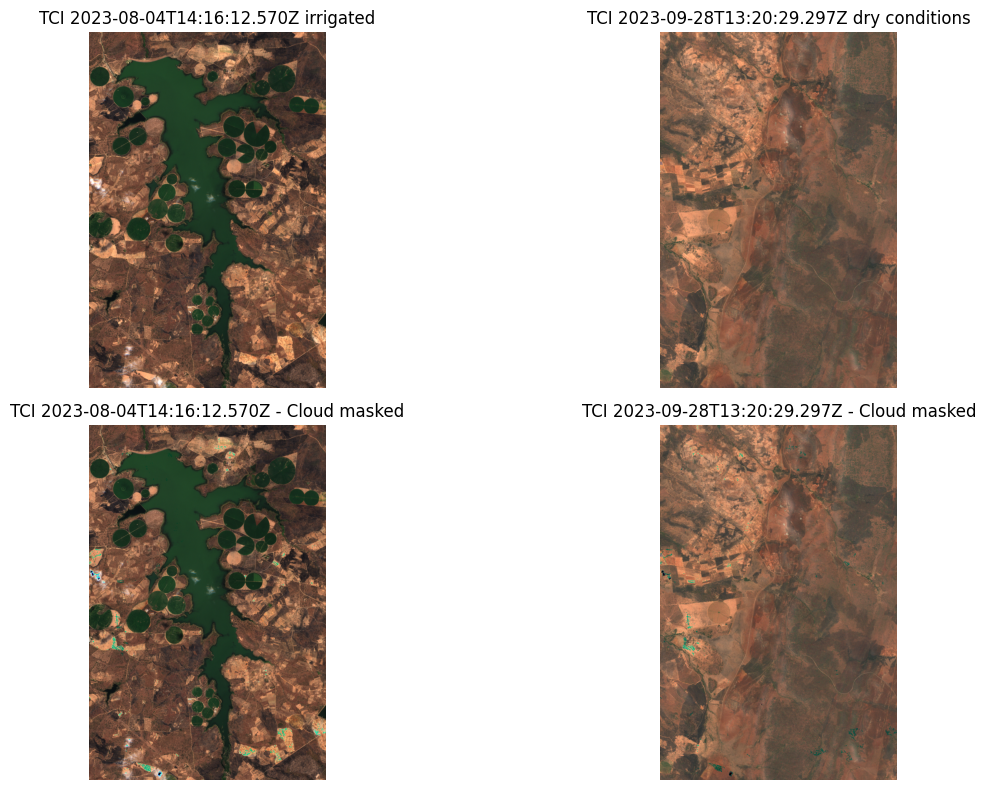

In [11]:
# Define the TCI images
tci_image_irrigated = publication_date_to_roi_map[list(publication_date_to_roi_map)[0]]
tci_image_dry = publication_date_to_roi_map[list(publication_date_to_roi_map)[-1]]
scl_masked = (tci_image_irrigated != 255) & (tci_image_dry != 255)

# Define the masks
masked_tci_image_irrigated = np.where(scl_masked, tci_image_irrigated, 0)
masked_tci_image_dry = np.where(scl_masked, tci_image_dry, 0)

plt.figure(figsize=(15, 8))

# Use the function to plot the tci images
plot_image(tci_image_irrigated, 221, f'TCI {list(publication_date_to_roi_map)[0]} irrigated')
plot_image(tci_image_dry, 222, f'TCI {list(publication_date_to_roi_map)[-1]} dry conditions')
plot_image(masked_tci_image_irrigated, 223, f'TCI {list(publication_date_to_roi_map)[0]} - Cloud masked')
plot_image(masked_tci_image_dry, 224, f'TCI {list(publication_date_to_roi_map)[-1]} - Cloud masked')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()


Calculating NDVI

In [12]:
# Create a dictionary to store NDVI data with publication dates
publication_date_to_ndvi_map = {}

# Loop through selected results
for result in selected_results:
    # Get the publication date
    publication_date_str = result.properties.get("publicationDate", "")
    print(publication_date_str)
    # Parse the publication date string into a datetime object
    publication_date = datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    # Build the path to Sentinel-2 data
    s2_dir = sandbox_project_root + result.properties['productIdentifier']
    r10m_path = glob(s2_dir + "/GRANULE/*/IMG_DATA/R10m")
    if r10m_path:        
        # caculating NDVI, RED is B4, NIR is B8
        nir_path = glob(r10m_path[0] + "/*B08*.jp2")
        red_path = glob(r10m_path[0] + "/*B04*.jp2")
        if os.path.exists(nir_path[0]) and os.path.exists(red_path[0]):
            print(red_path[0])
            print(nir_path[0])
            with rio.open(nir_path[0]) as nir_src:
                nir_array = nir_src.read()
            with rio.open(red_path[0]) as red_src:
                red_array = red_src.read()
            #NDVI = (NIR - RED) / (NIR + RED)
            ndvi_array = (nir_array - red_array) / (nir_array + red_array)

            # Getting the ROI; region of interest
            ndvi_roi = ndvi_array[:, 3300:4500, 3800:4600]
            transposed_ndvi = np.transpose(ndvi_roi, (1, 2, 0))
            # Store NDVI data with publication date
            publication_date_to_ndvi_map[result.properties["publicationDate"]] = transposed_ndvi
        #Print file not found
        else:
            print(f"NIR and Red file not found for {result.properties['productIdentifier']} or the file is corrupted.")
        

2023-08-04T14:16:12.570Z
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/08/04/S2B_MSIL2A_20230804T074619_N0509_R135_T35KRA_20230804T103843.SAFE/GRANULE/L2A_T35KRA_A033480_20230804T081148/IMG_DATA/R10m/T35KRA_20230804T074619_B04_10m.jp2
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/08/04/S2B_MSIL2A_20230804T074619_N0509_R135_T35KRA_20230804T103843.SAFE/GRANULE/L2A_T35KRA_A033480_20230804T081148/IMG_DATA/R10m/T35KRA_20230804T074619_B08_10m.jp2
2023-09-28T13:20:29.297Z
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/09/28/S2A_MSIL2A_20230928T074711_N0509_R135_T36KTF_20230928T112354.SAFE/GRANULE/L2A_T36KTF_A043175_20230928T081354/IMG_DATA/R10m/T36KTF_20230928T074711_B04_10m.jp2
/home/eoafrica/eodata/Sentinel-2/MSI/L2A/2023/09/28/S2A_MSIL2A_20230928T074711_N0509_R135_T36KTF_20230928T112354.SAFE/GRANULE/L2A_T36KTF_A043175_20230928T081354/IMG_DATA/R10m/T36KTF_20230928T074711_B08_10m.jp2


Masking out water class and clouds for comparing the images of the NDVI

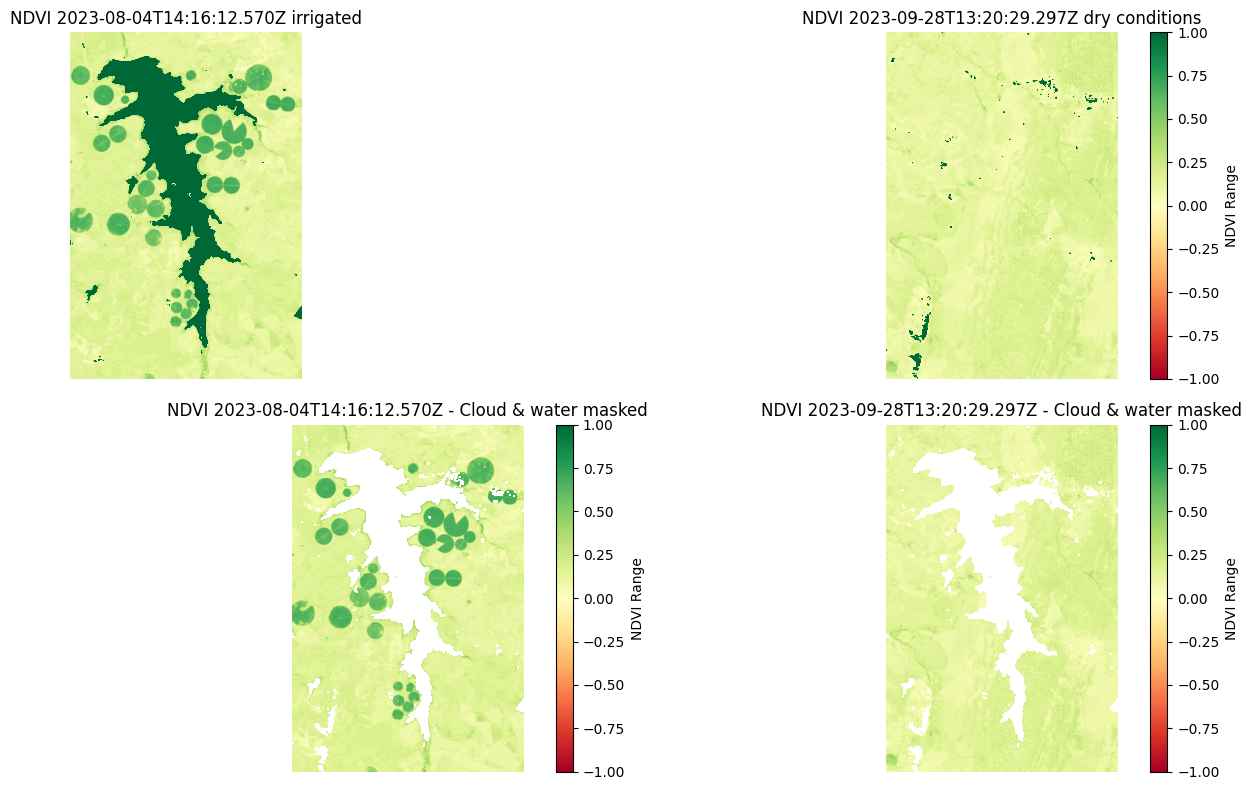

In [13]:
# Define the ndvi variables
ndvi_image_irrigated = publication_date_to_ndvi_map[list(publication_date_to_ndvi_map)[0]]
ndvi_image_dry = publication_date_to_ndvi_map[list(publication_date_to_ndvi_map)[1]]
scl_masked = (ndvi_image_irrigated != 255) & (ndvi_image_dry != 255)

masked_image_irrigated_scl = np.where(scl_masked, ndvi_image_irrigated, np.nan)
masked_image_dry_scl= np.where(scl_masked, ndvi_image_dry, np.nan)

# mask out water
water_masked = (ndvi_image_irrigated <=  1)& (ndvi_image_dry <=  1)

# Create the mask
masked_ndvi_image_irrigated = np.where(water_masked, masked_image_irrigated_scl, np.nan)
masked_ndvi_image_dry = np.where(water_masked, masked_image_dry_scl, np.nan)

plt.figure(figsize=(15, 8))  # Define the overall figure size

# Plot the images with prior defined plot_image function
plot_image(ndvi_image_irrigated, 221, f'NDVI {list(publication_date_to_ndvi_map)[0]} irrigated', 
           cmap='RdYlGn', vmin=-1, vmax=1)

plot_image(ndvi_image_dry, 222, f'NDVI {list(publication_date_to_ndvi_map)[-1]} dry conditions', 
           cmap='RdYlGn', vmin=-1, vmax=1, colorbar=True, colorbar_label='NDVI Range')

plot_image(masked_ndvi_image_irrigated, 223, f'NDVI {list(publication_date_to_ndvi_map)[0]} - Cloud & water masked', 
           cmap='RdYlGn', vmin=-1, vmax=1, colorbar=True, colorbar_label='NDVI Range')

plot_image(masked_ndvi_image_dry, 224, f'NDVI {list(publication_date_to_ndvi_map)[-1]} - Cloud & water masked', 
           cmap='RdYlGn', vmin=-1, vmax=1, colorbar=True, colorbar_label='NDVI Range')

plt.tight_layout()  # Adjust the layout
plt.show()


Calculate the differences in the NDVI images

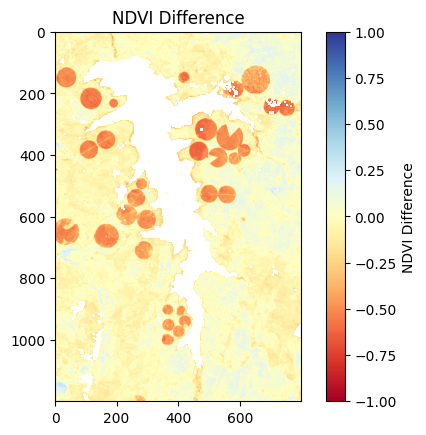

In [14]:
ndvi_difference = masked_ndvi_image_dry -  masked_ndvi_image_irrigated

# Since we now plot a image without subplots, we can't use our plot_image function

plt.imshow(ndvi_difference, cmap='RdYlBu', vmin=-1, vmax=1) 
plt.title('NDVI Difference')
plt.colorbar(label='NDVI Difference')
plt.show()

Comparing the two images from the beginning of August 2023 to the end of September 2023:
Red Areas: Typically indicate a decrease in vegetation while looking at negative values. This could be due to factors such as loss of vegetation, stress, or damage and especially in this case, missing irrigation. The darker the red color, the more significant the decrease.

Blue Areas: Typically indicate an increase in vegetation while looking at positived values. This could be due to factors such as new growth, improved health, or increased density of vegetation. The darker the blue, the more significant the increase. However, there are mainly red/decresing changes visible. 